In [ ]:
from google.colab import files

uploaded = files.upload()

Saving BankChurners.csv to BankChurners.csv


# Методы обертывания (Wrapper Methods)

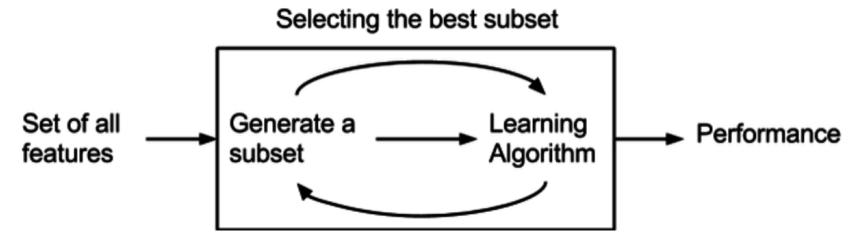

Недостатки:
- Увеличивается риск переобучения, когда число наблюдений недостаточно.
- Существенное время вычисления, когда число переменных велико.

## Прямой отбор признаков (Forward Selection)

>Начальное состояние - пустое множество отобранных признаков.  
>Условие остановки - добавление нового признака перестало улучшать производительность модели

Для оценки признака полноценно обучается на нем модель и проверяется результат

- roc_auc - классификация
- r2 - регрессия

```python
from sklearn.feature_selection import SequentialFeatureSelector
from scipy.spatial import transform

sfs = SequentialFeatureSelector(estimator, n_features_to_select, direction='forward', cv)
sfs.fit(X, y)
sfs_forward.transform(X).columns
```

## Обратное исключение признаков (Backward Elimination)

> Начальное состояние - все множетство признаков.  
> Условие остановки - удаление признака перестает добавлять точность модели.

```python
from sklearn.feature_selection import SequentialFeatureSelector
from scipy.spatial import transform

sfs = SequentialFeatureSelector(estimator, n_features_to_select, direction='backward', cv)
sfs.fit(X, y)
sfs_forward.transform(X).columns
```

## Исчерпывающий отбор признаков (Exhaustive Feature Selection)

>Начальное состояние - пустое множество оценок кобинации признаков  
>Условие остановки - полный перебор комбинаций

```python
from mlxtend.feature_selection import ExhaustiveFeatureSelector

#EFS takes too much time
efs = ExhaustiveFeatureSelector(estimator, min_features, max_features, cv)
efs.fit(X, y)
efs.best_feature_names_
```

## Рекурсивное исключение признаков (Recursive Feature Elimination)

>Начальное состояние - модель со всеми признаками (полный набор признаков)  
>Условие остановки - все признаки исчерпаны.

На основе порядка исключения признаков строится ранжированный список признаков

```python
from sklearn.feature_selection import RFE

rfe = RFE(estimator,n_features_to_select, step)
rfe.fit(X, y)
X.columns[rfe.support_]
```

# Встроеные методы (Embedded Method)

Преимущества:

- Собственный процесс выбора признака
- Выбор признаков и предсказание одновременно

## Модели с регуляризацией

> LASSO - L1  
> Концепция: введение ограничения на норму ветора коэффициентов модели  
> Преимушества:
> - повышение устойчивости модели в случае большего числа обусловленности матрицы признаков X
> - получение интерпретируемой модели  
>
> Когда есть несколько характеристик с высокой предсказательной способностью, а остальные бесполезны.

```python
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C, max_iter, solver='saga')
lr.fit(X, y)
lr.coef_[0]
```

## Модели с регуляризацией

> RIDGE - L2  
> Концепция: коэффициенты не должны принимать экстремальные значения 
> Использование:
> - Для борьбы с переизбытоностью данных
> - В линейных классификаторах избежать проблем мультиколлинеарности и переобучения
>
> Недостаток:
> -  Плохая обусловленности матрицы $X^T * X$ - неустойчивость оценок коэффициентов регрессии
>
> Когда предсказательная способность набора данных распределена между различными характеристиками

```python
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2', C, max_iter, solver='saga')
lr.fit(X, y)
lr.coef_[0]
```

## Модели с регуляризацией  
> - SMLR - Sparse Multinomial Logistic Regression  
> - ARD - Automatic Relevance Determination Regression 
> - Elastic Net 

## Модели на основе решающих деревьев

Преимущества:
- Хорошая точность
- Низкое переобучение
- Легкая интерпретируемость

> Случайный лес множества решающих деревьев  
> Уникальный случайный набор признаков и наблюдения из данных  
> Дерево - последовательность вопросов ветвлений  
> Каждый узел делит набор данных на две ветви  

> - Классификация - прирост информации или критерий Джини  
> - Регрессия - величина дисперсии  

1. Boruta  
2. ACE - Artificial Contrasts with Ensembles

## Модели на основе решающих деревьев

> **Бустинг** 
> Суть - каждая новая модель уменьшает ошибку предыдущей  

> **Адаптивный бустинг (AdaBoost)**  
> Основная идея
> - увеличении веса ошибочно классифицированных объектов, чтобы следующая модель лучше сработала на них  
> 
> Критерий остановки  
> - граница изменения функции ошибки 
> - ограничение по количеству самих предикторов.



## Модели на основе решающих деревьев

> **Градиентный бустинг**  
> Основная идея  
> - Минимизируется функция потерь


```python
from sklearn.ensemble import GradientBoostingClassifier

xgb = GradientBoostingClassifier(loss, n_estimators, max_depth)
xgb.fit(X, y)
xgb.feature_importances_
```

## Модели на основе решающих деревьев

> - Экстремальный Градиентный Бустинг (XGBoost)  
> - Категориальный бустинг (CatBoost)  
> - Легкий градиентный бустинг (Light GB)

# Сравнение результатов

> Dataset: BankChurners  
> Link: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers  
> 18 -> 1

После предобработки:
```
df.describe()
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
    Column                    Non-Null Count  Dtype    
 0   Customer_Age              10127 non-null  float64
 1   Dependent_count           10127 non-null  float64
 2   Months_on_book            10127 non-null  float64
 3   Total_Relationship_Count  10127 non-null  float64
 4   Months_Inactive_12_mon    10127 non-null  float64
 5   Contacts_Count_12_mon     10127 non-null  float64
 6   Credit_Limit              10127 non-null  float64
 7   Total_Revolving_Bal       10127 non-null  float64
 8   Avg_Open_To_Buy           10127 non-null  float64
 9   Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 10  Total_Trans_Amt           10127 non-null  float64
 11  Total_Trans_Ct            10127 non-null  float64
 12  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 13  Avg_Utilization_Ratio     10127 non-null  float64
 14  Attrition_Flag            10127 non-null  int64  
 15  Gender                    10127 non-null  int64  
 16  Education_Level           10127 non-null  int64  
 17  Marital_Status            10127 non-null  int64  
 18  Income_Category           10127 non-null  int64  
 19  Card_Category             10127 non-null  int64  
 20  Naive_1                   10127 non-null  float64
 21  Naive_2                   10127 non-null  float64
dtypes: float64(16), int64(6)
memory usage: 1.7 MB
```


# Сравнение результатов  

```python
plt.figure(figsize=[20,10])
sns.heatmap(X.corr(), annot=True, mask=np.triu(X.corr()))
```

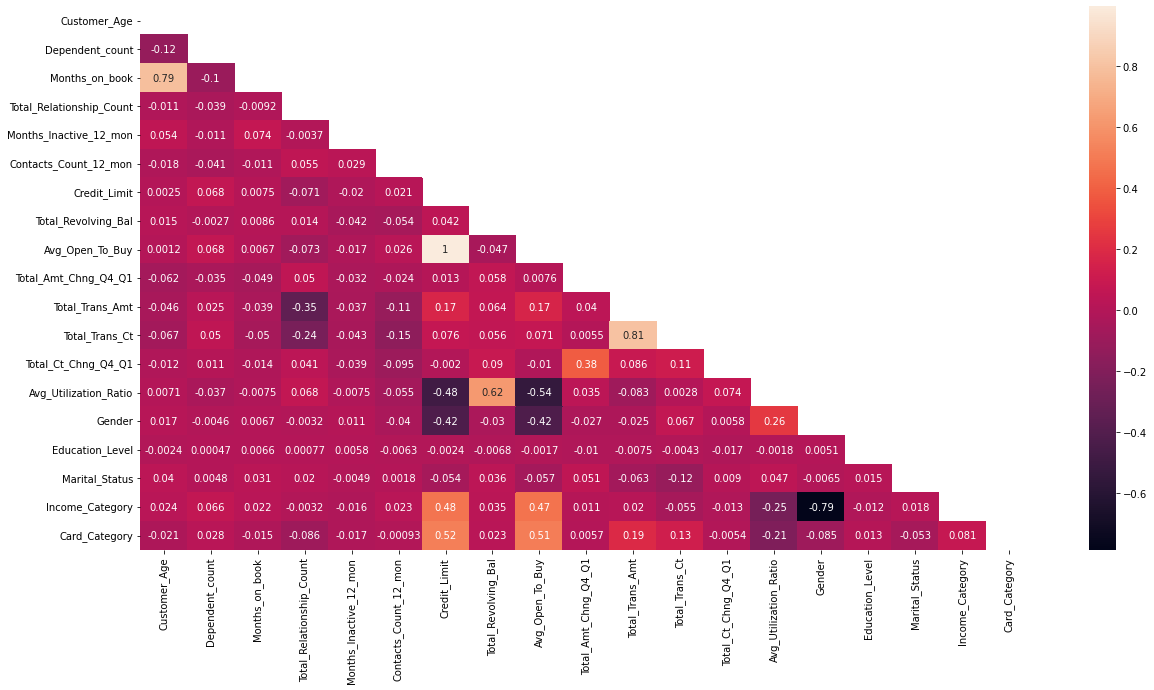

# Сравнение результатов  

Получение скора

```python
def GetScore(_X_train, _X_test, _y_train, _y_test) -> float:

  model = LogisticRegression(solver='liblinear', random_state=0)
  result = model.fit(_X_train, _y_train)

  y_pred_prob = result.predict_proba(_X_test)
  y_pred_prob = [i[1] for i in y_pred_prob]

  return f"roc_auc: {roc_auc_score(_y_test, y_pred_prob)}, f1: {f1_score(_y_test, result.predict(_X_test))}"

```

# Сравнение результатов

```
Common: roc_auc: 0.9147035680369014, f1: 0.6373626373626374

['Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1', 'Education_Level', 'Marital_Status']
Forward selection: roc_auc: 0.8254510921177588, f1: 0.5392354124748491

['Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1', 'Marital_Status']
Backward selection: roc_auc: 0.8028689006466785, f1: 0.506276150627615

['Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Gender']
Recursive selection: roc_auc: 0.914642065753177, f1: 0.6533575317604355

['Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Gender']
Lasso: roc_auc: 0.914642065753177, f1: 0.6533575317604355

['Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Gender']
Ridge: roc_auc: 0.914642065753177, f1: 0.6533575317604355

['Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']
XGBoost: roc_auc: 0.9128802062135396, f1: 0.6176470588235293
```

# Ссылки

> Обзорные статьи по теме
> - [https://pub.towardsai.net/feature-selection-in-machine-learning-3b2902852933](https://pub.towardsai.net/feature-selection-in-machine-learning-3b2902852933)
> - [http://course.omgtu.ru/wp-content/uploads/2021/04/11_Отбор_признаков.pdf](http://course.omgtu.ru/wp-content/uploads/2021/04/11_%D0%9E%D1%82%D0%B1%D0%BE%D1%80_%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%B2.pdf)
> - [https://habr.com/ru/post/550978/](https://habr.com/ru/post/550978/)
> - [https://habr.com/ru/company/jetinfosystems/blog/470622/](https://habr.com/ru/company/jetinfosystems/blog/470622/)

> Смещение и разброс  
> - [https://alexanderdyakonov.wordpress.com/2018/04/25/смещение-bias-и-разброс-variance-модели-алгорит/](https://alexanderdyakonov.wordpress.com/2018/04/25/%D1%81%D0%BC%D0%B5%D1%89%D0%B5%D0%BD%D0%B8%D0%B5-bias-%D0%B8-%D1%80%D0%B0%D0%B7%D0%B1%D1%80%D0%BE%D1%81-variance-%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8-%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82/)

> Рекурсивное исключение признаков в scikit-learn
> - [https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV)
> - [https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE)

> Регрессия
> - SMLR - [https://github.com/KamitaniLab/smlr](https://github.com/KamitaniLab/smlr)
> - ARD - [https://scikit-learn.org/stable/auto_examples/linear_model/plot_ard.html](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ard.html)
> - ElasticNet - [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

> Случайный лес
> - [https://alexanderdyakonov.wordpress.com/2016/11/14/случайный-лес-random-forest/](https://alexanderdyakonov.wordpress.com/2016/11/14/%d1%81%d0%bb%d1%83%d1%87%d0%b0%d0%b9%d0%bd%d1%8b%d0%b9-%d0%bb%d0%b5%d1%81-random-forest/)
> - Boruta - [https://www.jstatsoft.org/article/view/v036i11](https://www.jstatsoft.org/article/view/v036i11)
> - ACE - [https://www.researchgate.net/publication/220320233_Feature_Selection_with_Ensembles_Artificial_Variables_and_Redundancy_Elimination](https://www.researchgate.net/publication/220320233_Feature_Selection_with_Ensembles_Artificial_Variables_and_Redundancy_Elimination) 

> Бустинг
> - [https://alexanderdyakonov.wordpress.com/2019/04/19/ансамбли-в-машинном-обучении/](https://alexanderdyakonov.wordpress.com/2019/04/19/%d0%b0%d0%bd%d1%81%d0%b0%d0%bc%d0%b1%d0%bb%d0%b8-%d0%b2-%d0%bc%d0%b0%d1%88%d0%b8%d0%bd%d0%bd%d0%be%d0%bc-%d0%be%d0%b1%d1%83%d1%87%d0%b5%d0%bd%d0%b8%d0%b8/)
> - [https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/](https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/)
> - [https://lambda-it.ru/post/busting-s-pomoshchiu-adaboost-i-gradient-boosting](https://lambda-it.ru/post/busting-s-pomoshchiu-adaboost-i-gradient-boosting)

In [ ]:
import pandas as pd

df = pd.read_csv("BankChurners.csv")
df = df.rename(columns={"Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1": "Naive_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2": "Naive_2"})


df['Attrition_Flag'] = df['Attrition_Flag'].map({'Attrited Customer':1,'Existing Customer':0})
df['Gender'] = df['Gender'].map({'F':1,'M':0})
df['Education_Level'] = df['Education_Level'].map({'Unknown':0,
                                                       'Uneducated':1,
                                                       'High School':2,
                                                       'College':3,
                                                       'Graduate':4,
                                                       'Post-Graduate':5,
                                                       'Doctorate':6})
df['Income_Category'] = df['Income_Category'].map({'Unknown':0,
                                                       'Less than $40K':1,
                                                       '$40K - $60K':2,
                                                       '$60K - $80K':3,
                                                       '$80K - $120K':4,
                                                       '$120K +':5})
df['Card_Category'] = df['Card_Category'].map({'Blue':0,
                                                   'Silver': 1,
                                                   'Gold':1,
                                                   'Platinum':1})
df['Marital_Status'] = df['Marital_Status'].map({'Unknown':0, 'Single':1, 'Divorced':2, 'Married':3})

numeric = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
          'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
          'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 
          'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

df = df.drop(columns=['CLIENTNUM'])

df_numeric = df[numeric]
df_categoric = df.drop(columns=numeric)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_numeric)
df_numeric = pd.DataFrame(scaler.transform(df_numeric), columns=numeric)

df = pd.concat([df_numeric, df_categoric], axis=1)

df.info()
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  float64
 1   Dependent_count           10127 non-null  float64
 2   Months_on_book            10127 non-null  float64
 3   Total_Relationship_Count  10127 non-null  float64
 4   Months_Inactive_12_mon    10127 non-null  float64
 5   Contacts_Count_12_mon     10127 non-null  float64
 6   Credit_Limit              10127 non-null  float64
 7   Total_Revolving_Bal       10127 non-null  float64
 8   Avg_Open_To_Buy           10127 non-null  float64
 9   Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 10  Total_Trans_Amt           10127 non-null  float64
 11  Total_Trans_Ct            10127 non-null  float64
 12  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 13  Avg_Utilization_Ratio     10127 non-null  float64
 14  Attrit

In [ ]:
Y = df['Attrition_Flag']
X = df.drop(columns=['Attrition_Flag', 'Naive_1', 'Naive_2'])

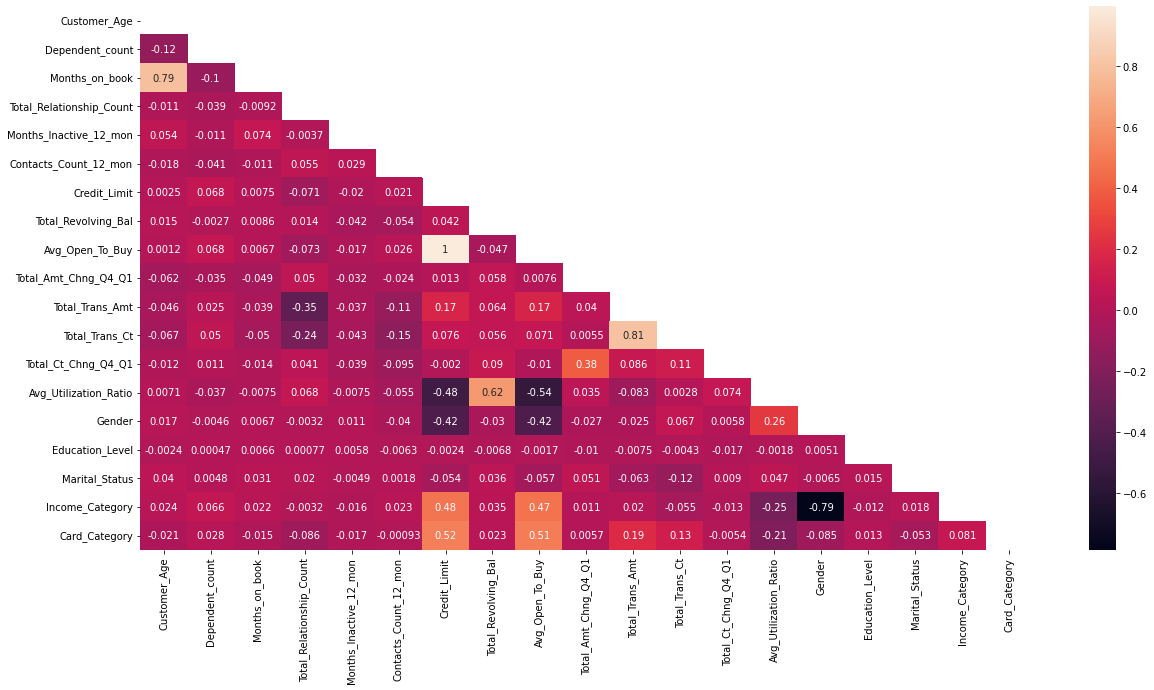

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=[20,10])
sns.heatmap(X.corr(), annot=True, mask=np.triu(X.corr()))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

def GetScore(_X_train, _X_test, _y_train, _y_test) -> float:

  model = LogisticRegression(solver='liblinear', random_state=0)
  result = model.fit(_X_train, _y_train)

  y_pred_prob = result.predict_proba(_X_test)
  y_pred_prob = [i[1] for i in y_pred_prob]

  return f"roc_auc: {roc_auc_score(_y_test, y_pred_prob)}, f1: {f1_score(_y_test, result.predict(_X_test))}"


In [ ]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from sklearn.model_selection import StratifiedKFold
from mlxtend.feature_selection import ExhaustiveFeatureSelector

from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.svm import SVR

def GetSfs(_X, _y, _direction):
  scv = StratifiedKFold(n_splits=5)

  sfs = SequentialFeatureSelector(LogisticRegression(C=10, max_iter=10000), n_features_to_select=8, direction=_direction, cv=scv, n_jobs=-1)
  sfs = sfs.fit(_X, _y)

  return sfs

def GetRfe(_X, _y):
  scv = StratifiedKFold(n_splits=5)
  

  rfe = RFE(LogisticRegression(C=10, max_iter=10000), n_features_to_select=8, step=1)
  rfe = rfe.fit(_X, _y)

  return rfe

def GetEsf(_X, _y):
  scv = StratifiedKFold(n_splits=5)
  efs = ExhaustiveFeatureSelector(LogisticRegression(C=10, max_iter=10000), min_features=1, max_features=8, scoring='accuracy', cv=scv)

  efs.fit(_X, _y)
  return efs

In [ ]:
from scipy.spatial import transform

print("Common: " + str(GetScore(X_train, X_test, y_train, y_test)) + "\n")

sfs_forward = GetSfs(X, Y, "forward")
print(list(X.columns[sfs_forward.get_support()]))
print("Forward selection: " + str(GetScore(sfs_forward.transform(X_train),sfs_forward.transform(X_test), y_train, y_test)) + "\n")

sfs_backward = GetSfs(X, Y, "backward")
print(list(X.columns[sfs_backward.get_support()]))
print("Backward selection: " + str(GetScore(sfs_backward.transform(X_train),sfs_backward.transform(X_test), y_train, y_test)) + "\n")

#EFS takes too much time
# efs = GetEsf(X, Y)
# print(list(efs.best_feature_names_))
# print("Exhaustive selection: " + str(GetScore(X_train[list(efs.best_feature_names_)], X_test[list(efs.best_feature_names_)], y_train, y_test)))

rfe = GetRfe(X, Y)
print(list(X.columns[rfe.support_]))
print("Recursive selection: " + str(GetScore(rfe.transform(X_train), rfe.transform(X_test), y_train, y_test)) + "\n")

Common: roc_auc: 0.9147035680369014, f1: 0.6373626373626374

['Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1', 'Education_Level', 'Marital_Status']
Forward selection: roc_auc: 0.8254510921177588, f1: 0.5392354124748491

['Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1', 'Marital_Status']
Backward selection: roc_auc: 0.8028689006466785, f1: 0.506276150627615

['Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Gender']
Recursive selection: roc_auc: 0.914642065753177, f1: 0.6533575317604355



In [ ]:
def LogRig(penalty_, name):
  lr = LogisticRegression(C=10, max_iter=10000, penalty=penalty_, solver='saga').fit(X_train, y_train)
  ByFeatureImportances(lr.coef_[0], name)
  
def ByFeatureImportances(vec, name):
  print(vec)
  value = np.sort(np.absolute(vec))[-9]
  print(list(X_train.iloc[:, lambda X_train: np.where(abs(vec)-value > 0)[0]].columns))
  print(name + ": " + str(GetScore(X_train.iloc[:, lambda X_train: np.where(abs(vec)-value > 0)[0]], 
                                X_test.iloc[:, lambda X_test: np.where(abs(vec)-value > 0)[0]], 
                                y_train, 
                                y_test)) 
                                + "\n")

LogRig('l1', 'Lasso')
LogRig('l2', 'Ridge')

[ 9.78402384e-03  2.30599679e-01 -7.80664152e-02 -7.49908742e-01
  5.24108413e-01  5.73856207e-01 -9.25543492e-02 -7.31279694e-01
 -2.95973886e-02 -8.49845080e-02  1.56233267e+00 -2.72930845e+00
 -6.67488406e-01 -8.66928424e-02  9.45930906e-01  7.51442161e-04
 -2.53566402e-01  1.26946634e-01  4.19956222e-01]
['Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Gender']
Lasso: roc_auc: 0.914642065753177, f1: 0.6533575317604355

[ 1.07390025e-02  2.30665812e-01 -7.89671517e-02 -7.49877578e-01
  5.24122377e-01  5.73898134e-01 -9.43529428e-02 -7.30652444e-01
 -2.88295465e-02 -8.50509798e-02  1.56072708e+00 -2.72746373e+00
 -6.67519998e-01 -8.74647758e-02  9.46100099e-01  8.21763813e-04
 -2.53573614e-01  1.27323654e-01  4.23087999e-01]
['Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_C

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

xgb = GradientBoostingClassifier(n_estimators=100)
xgb.fit(X_train, y_train)

ByFeatureImportances(xgb.feature_importances_, "XGBoost")

[1.02463295e-02 4.17484781e-06 1.73121876e-03 9.58967250e-02
 1.55094784e-02 1.71089439e-02 6.05774513e-04 1.91110687e-01
 2.85653413e-03 2.98336478e-02 1.94189109e-01 3.37755565e-01
 9.98173253e-02 1.04635637e-03 5.57010143e-04 5.52725645e-04
 8.94809729e-04 2.83585102e-04 0.00000000e+00]
['Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']
XGBoost: roc_auc: 0.9128802062135396, f1: 0.6176470588235293

